# Market-cap Deciles and Distribution

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(pracma)
library(ggthemes)
library(reshape2)
library(quantmod)
library(lubridate)
library(ggrepel)
library(PerformanceAnalytics)
library(ggpubr)

options(repr.plot.width=16, repr.plot.height=8)
options(tibble.width = Inf)

equities <- EquitiesIndiaNse()

In [3]:
startEndMisc <- equities$MarketCapDecile() %>%
    summarize(S = min(TIME_STAMP), E = max(TIME_STAMP)) %>%
    collect()

startDate <- as.Date(startEndMisc$S[1])
endDate <- as.Date(startEndMisc$E[1])

In [9]:
startAggMktCap <- equities$MarketCapDecile() %>%
    inner_join(equities$MiscInfo(), by=c('TIME_STAMP', 'SYMBOL')) %>%
    filter(TIME_STAMP == startDate & DECILE < 10) %>%
    group_by(DECILE) %>%
    summarize(FF = sum(FF_MKT_CAP_CR)) %>%
    select(DECILE, FF) %>%
    collect()

endAggMktCap <- equities$MarketCapDecile() %>%
    inner_join(equities$MiscInfo(), by=c('TIME_STAMP', 'SYMBOL')) %>%
    filter(TIME_STAMP == endDate & DECILE < 10) %>%
    group_by(DECILE) %>%
    summarize(FF = sum(FF_MKT_CAP_CR)) %>%
    select(DECILE, FF) %>%
    collect()

In [18]:
aggMktCap <- startAggMktCap %>% 
    inner_join(endAggMktCap, by=c('DECILE'))
    
aggMktCap %>% 
    mutate(CHANGE = 100*(`FF.y`/`FF.x`-1)) %>%
    print()

# A tibble: 10 x 4
   DECILE     FF.x     FF.y CHANGE
    <int>    <dbl>    <dbl>  <dbl>
 1      0 3431516. 6218028. 81.2  
 2      1  308404.  541794. 75.7  
 3      2  124792.  194948. 56.2  
 4      3   61726.   92970. 50.6  
 5      4   32304.   47355. 46.6  
 6      5   17661.   24100. 36.5  
 7      6    9198.   11686. 27.0  
 8      7    4985.    6175. 23.9  
 9      8    2390.    2644. 10.6  
10      9     791.     786. -0.555


In [19]:
aggMktCapDf <- data.frame(aggMktCap)
names(aggMktCapDf) <- c('DECILE', 'BeginCap', 'EndCap')
aggMktCapMelt <- melt(aggMktCapDf, id='DECILE')
aggMktCapMelt$value <- aggMktCapMelt$value/1000

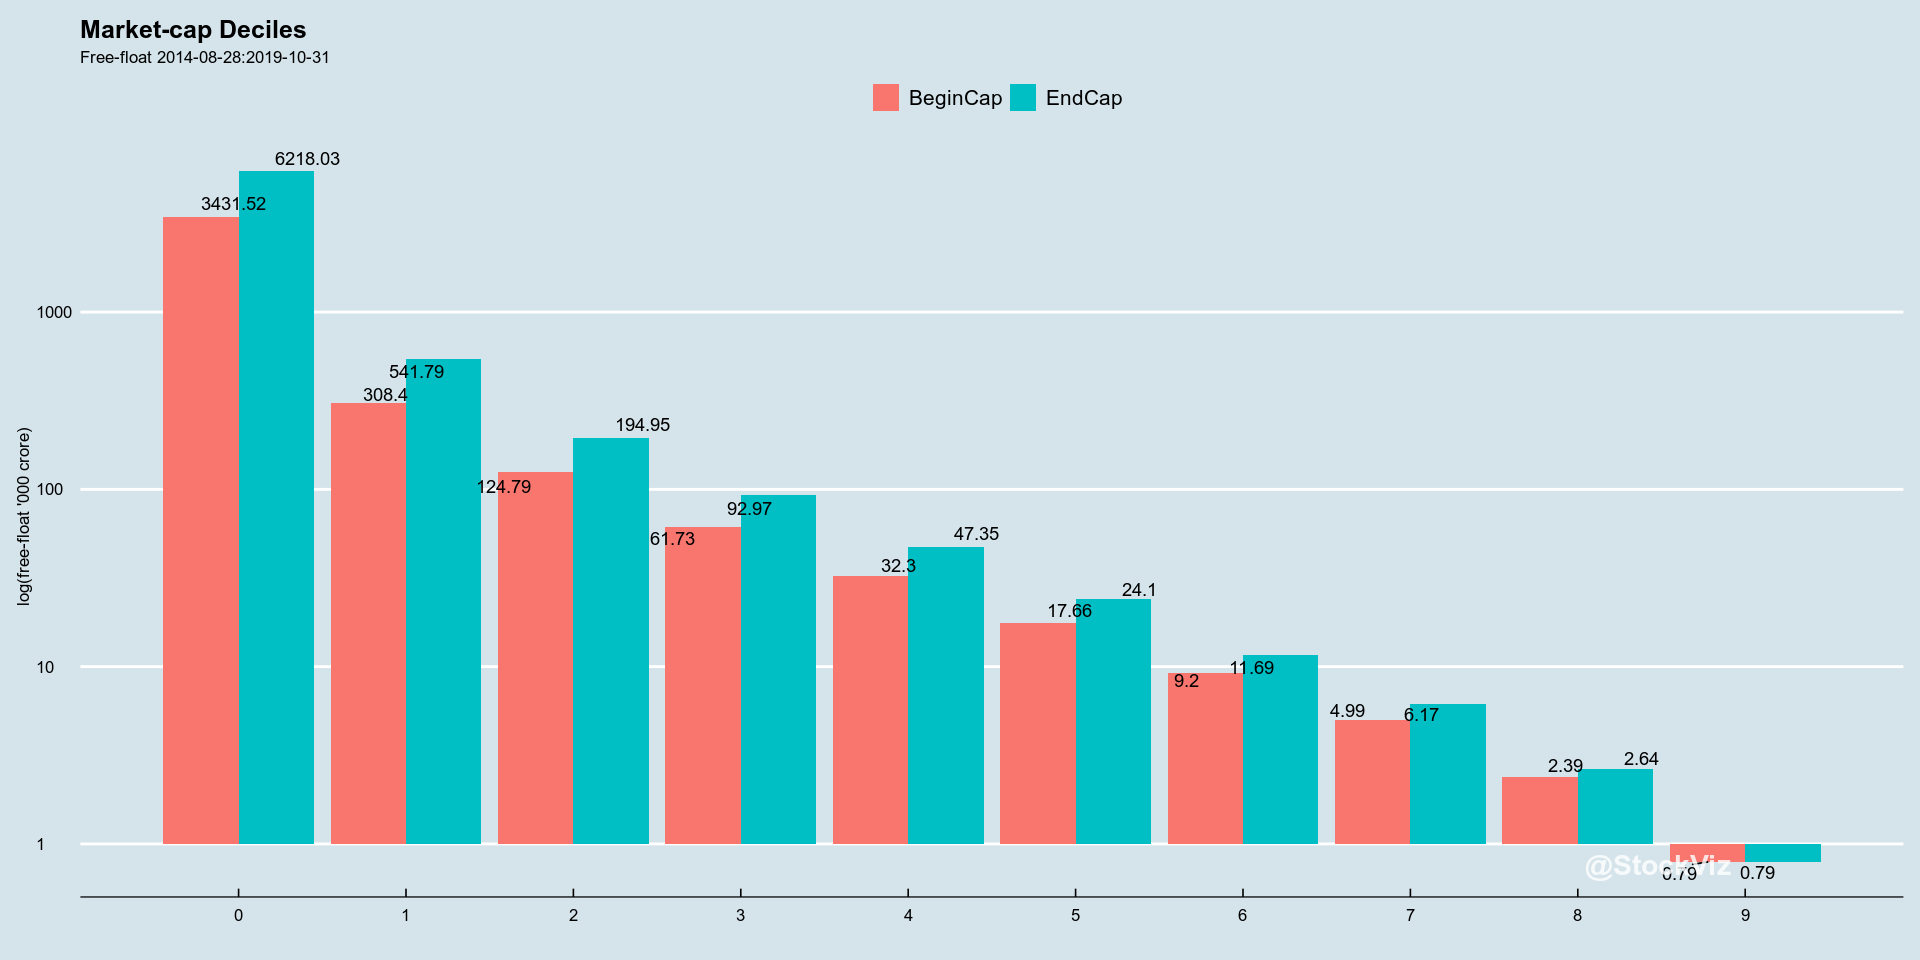

In [20]:
ggplot(aggMktCapMelt, aes(x=DECILE, y=value, fill=variable)) +
    theme_economist() +
    geom_bar(stat="identity", position=position_dodge()) +
    scale_x_continuous(labels=aggMktCapDf$DECILE, breaks=aggMktCapDf$DECILE) +
    scale_y_log10() +
    geom_text_repel(aes(label= round(value, 2)), position = position_dodge(0.9)) +
    labs(x='', y="log(free-float '000 crore)", fill='', title="Market-cap Deciles", subtitle=sprintf("Free-float %s:%s", startDate, endDate)) +
    annotate("text", x=max(aggMktCapDf$DECILE), y=0, 
             label = "@StockViz", hjust=1.1, vjust=-1.1, 
             col="white", cex=6, fontface = "bold", alpha = 0.8)  


This notebook was created using [pluto](https://pluto.studio). Thank you for playing fair!